### Les 04

### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = lr.predict(X_test)

In [10]:
check = pd.DataFrame({'y_test':y_test['price'],
                     'y_pred':y_pred.flatten()},
                    columns=['y_test', 'y_pred'])

check['error'] = check['y_pred'] - check['y_test']

check.head(1)

,y_test,y_pred,error
173,23.6,28.64896,5.04896


In [11]:
from sklearn.metrics import mean_squared_error as mse

In [12]:
init_mse = mse(check['y_test'], check['y_pred'])
init_mse

21.517444231177382

In [13]:
r2_1 = r2_score(y_test, y_pred)

r2_1

0.7112260057484909

### Результат задания № 1
R2 = 0.7112260057484909

MSE = 21.517444231177382

### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, 
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, 
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [16]:
model.fit(X_train, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
y_pred2 = model.predict(X_test)

In [18]:
check2 = pd.DataFrame({'y_test': y_test['price'],
                      'y_pred': y_pred2.flatten()},
                     columns=['y_test', 'y_pred', 'error'])

check2['error'] = check2['y_pred'] - check2['y_test']

check2.head()

,y_test,y_pred,error
173,23.6,22.846138,-0.753862
274,32.4,31.156114,-1.243886
491,13.6,16.297226,2.697226
72,22.8,23.821036,1.021036
452,16.1,17.212148,1.112148


In [19]:
init_mse2 = mse(check2['y_test'], check2['y_pred'])

init_mse2

9.31439570598467

In [20]:
r2_2 = r2_score(y_test, y_pred2)

r2_2

0.8749965273218174

### Результат задания № 2
R2 = 0.8749965273218174

MSE = 9.31439570598467

### Результат сравнения моделей

Вторая модель показывает лучший результат с меньшей ошибкой.

- Результат задания № 1:

        R2 = 0.7112260057484909

        MSE = 21.517444231177382

- Результат задания № 2:

        R2 = 0.8749965273218174

        MSE = 9.31439570598467

В результате небольшого исследования я нашел более оптимальные параметры для второй модели:

- Результат уточненной модели:

        R2 = 0.8780659040198407

        MSE = 9.08568694675108

In [21]:
mse_list_1 = []
r2_1 = []

for i in np.arange(1, 13):
    model_2 = RandomForestRegressor(n_estimators=1000, max_depth=i, random_state=42)
    
    model_2.fit(X_train, y_train.values[:,0])
    
    y_pred3 = model_2.predict(X_test)
    
    init_mse_3 = mse(y_test['price'], y_pred3.flatten())
    
    r2_3 = r2_score(y_test, y_pred3)
    
    mse_list_1.append(init_mse_3)
    
    r2_1.append(r2_3)

In [22]:
mse_list_2 = []
r2_2 = []

for i in np.arange(1, 301):
    model_2 = RandomForestRegressor(n_estimators=i, max_depth=11, random_state=42)
    
    model_2.fit(X_train, y_train.values[:,0])
    
    y_pred3 = model_2.predict(X_test)
    
    init_mse_3 = mse(y_test['price'], y_pred3.flatten())
    
    r2_3 = r2_score(y_test, y_pred3)
    
    mse_list_2.append(init_mse_3)
    
    r2_2.append(r2_3)

In [23]:
print(min(mse_list_1))
print(mse_list_1.index(min(mse_list_1)))

9.30715418506647
10


In [24]:
print(max(r2_1))
print(r2_1.index(max(r2_1)))

0.875093711861837
10


In [25]:
print(min(mse_list_2))
print(mse_list_2.index(min(mse_list_2)))

9.08568694675108
66


In [26]:
print(max(r2_2))
print(r2_2.index(max(r2_2)))

0.8780659040198407
66


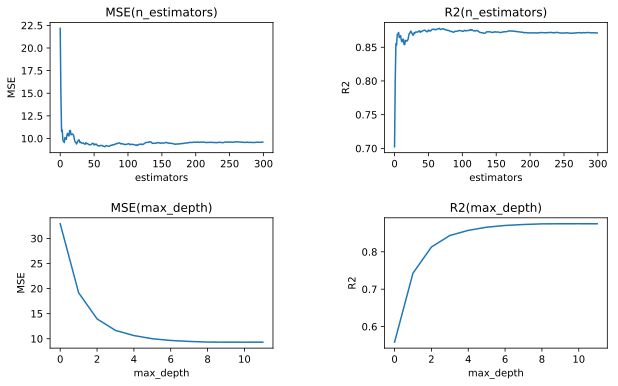

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(mse_list_2)
ax1.set_title('MSE(n_estimators)')
ax1.set_xlabel('estimators')
ax1.set_ylabel('MSE')

ax2.plot(r2_2)
ax2.set_title('R2(n_estimators)')
ax2.set_xlabel('estimators')
ax2.set_ylabel('R2')

ax3.plot(mse_list_1)
ax3.set_title('MSE(max_depth)')
ax3.set_xlabel('max_depth')
ax3.set_ylabel('MSE')

ax4.plot(r2_1)
ax4.set_title('R2(max_depth)')
ax4.set_xlabel('max_depth')
ax4.set_ylabel('R2')


fig.set_size_inches(10, 6)
plt.subplots_adjust(wspace=0.5, hspace=0.5)


### Модель с уточненными параметрами

In [28]:
model_2 = RandomForestRegressor(n_estimators=67, max_depth=11, random_state=42)
model_2.fit(X_train, y_train.values[:,0])

y_pred3 = model_2.predict(X_test)

init_mse_3 = mse(y_test['price'], y_pred3.flatten())

r2_3 = r2_score(y_test, y_pred3)

mse_list_2.append(init_mse_3)

r2_2.append(r2_3)

print(r2_3)
print(init_mse_3)

0.8780659040198407
9.08568694675108


### Результат уточненной модели

R2 = 0.8780659040198407

MSE = 9.08568694675108

### * Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [29]:
model_2 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
res = model_2.fit(X_train, y_train.values[:,0])

f = pd.DataFrame(res.feature_importances_, X_test.columns, columns=['imp'])
f.nlargest(2, 'imp')

,imp
LSTAT,0.415679
RM,0.402705


In [30]:
print('Сумма показателей важности:', sum(f.values.flatten()))

Сумма показателей важности: 0.9999999999999993


### * Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже 
знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.

Для этого датасета мы будем решать задачу классификации - будем определять, 
какие из транзакциции по кредитной карте являются мошенническими.

Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),
так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [32]:
data = pd.read_csv('creditcard.csv')

In [33]:
df = pd.DataFrame(data)

In [34]:
pd.options.display.max_columns=100

In [35]:
# df.head(10)

In [36]:
X, y = df.loc[:, df.columns != 'Class'], pd.Series(df['Class'])

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15], 
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100), 
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом, 
полученным на тренировочных данных, используя в качестве аргументов
массивы y_test и y_pred_proba.

In [37]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [38]:
params = [{'n_estimators':[10, 15],
          'max_features': np.arange(3, 5),
          'max_depth': np.arange(4, 7)}]

In [39]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=params,
                   scoring='roc_auc',
                   cv=3)

In [40]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [41]:
clf.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 15}

In [42]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.00027881, 0.00027881, 0.00027881, ..., 0.00027881, 0.00027881,
       0.00027881])

In [45]:
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.9702035175850038

### *Дополнительные задания:

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.


In [50]:
from sklearn.datasets import load_wine

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.


In [63]:
data = load_wine()

data_keys = data.keys()

data_keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.


In [69]:
# for line in data.DESCR.split('\n'):
#     print(line)

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.


In [70]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.


In [74]:
X = pd.DataFrame(data=data.data,
                columns=data.feature_names)

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.


In [84]:
X.info(), X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


(None, (178, 13))

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.



In [99]:
X['target'] = data.target.astype('int64')

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [157]:
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

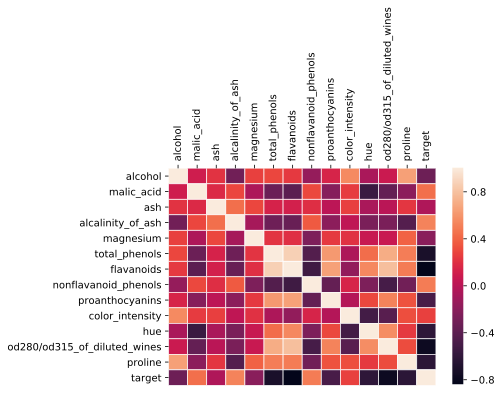

In [158]:
X_corr = X.corr()

plt.subplots(figsize=(6,4))

sns.heatmap(X_corr, linewidths=.7).xaxis.set_ticks_position('top')

plt.xticks(rotation=90)

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).


In [172]:
high_corr = X_corr.drop('target', axis=0)
high_corr = high_corr.loc[np.abs(high_corr['target']) > 0.5]

high_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
hue,-0.071747,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183,-0.617369
od280/od315_of_diluted_wines,0.072343,-0.368710,0.003911,-0.276769,0.066004,0.699949,0.787194,-0.503270,0.519067,-0.428815,0.565468,1.000000,0.312761,-0.788230
proline,0.643720,-0.192011,0.223626,-0.440597,0.393351,0.498115,0.494193,-0.311385,0.330417,0.316100,0.236183,0.312761,1.000000,-0.633717


10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.